In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Для того, чтобы посчитать выборочное матожидание будем моделировать ситуацию `number_of_experiments` раз. 

Пусть `number_of_experiments = 10^4`

Сначала смоделируем пункт (а)

In [2]:
def model_simple_case(a: float, clients: int, windows: int):
    number_of_experiments = 10000
    total_waiting_time = np.zeros(clients)
    for _ in range(number_of_experiments):
        experiment = np.random.exponential(scale=1/a, size=windows)
        total_waiting_time += sorted(experiment)[:clients]
    return total_waiting_time / number_of_experiments

Посмотрим, что происходит с выборочным матожиданием при изменении параметра $\alpha$. Возьмём `100` окошек и `100` человек

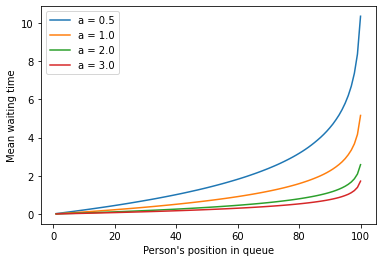

In [3]:
alphas = [0.5, 1.0, 2.0, 3.0]
clients = 100
windows = 100

for a in alphas:
    plt.plot(np.arange(1, clients + 1), model_simple_case(a, clients, windows), label=f'a = {a}')

plt.xlabel('Person\'s position in queue')
plt.ylabel('Mean waiting time')
plt.legend()
plt.show()

Теперь посмотрим, на выборочное матожидание при изменении числа окошек. Возьмём $\alpha$ равное `1` и `100` человек

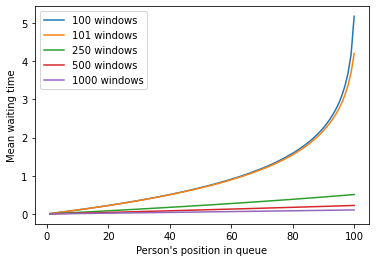

In [4]:
windows = [100, 101, 250, 500, 1000]
clients = 100
alpha = 1.0

for w in windows:
    plt.plot(np.arange(1, clients + 1), model_simple_case(alpha, clients, w), label=f'{w} windows')

plt.xlabel('Person\'s position in queue')
plt.ylabel('Mean waiting time')
plt.legend()
plt.show()

Следующий график показывает изменение выборочного матожидания при изменении числа людей. $\alpha$ равно `1`, а количество окошек равно `100`  

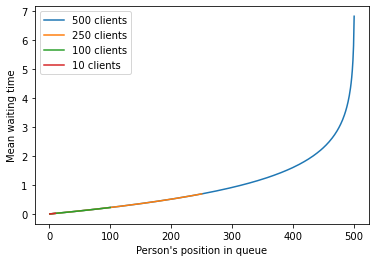

In [5]:
clients = [500, 250, 100, 10]
windows = 500
alpha = 1.0

for c in clients:
    plt.plot(np.arange(1, c + 1), model_simple_case(alpha, c, windows), label=f'{c} clients')

plt.xlabel('Person\'s position in queue')
plt.ylabel('Mean waiting time')
plt.legend()
plt.show()

Также, сравним выборочное матожидание времени ожидания с результатами полученными на паре. На паре мы получили, следующее
$$
X_{(1)} \sim Exp(n\alpha), \,\,\,\,\,\,\, X_{(k + 1)} - X_{(k)} \sim Exp((n - k)\alpha),
$$
Отсюда получаем, что матожидание времени ожидания $k$-того человека в очереди равно:
$$
\mathsf{E}X_{(k)} = \frac{1}{\alpha}\sum\limits_{i = 0}^{k - 1}\frac{1}{n - i}
$$

Воспользовавшись данной формулой, построим разность реального матожидания и выборочного. Возьмём `100` человек, `100` окошек и $\alpha$, равное `2` 

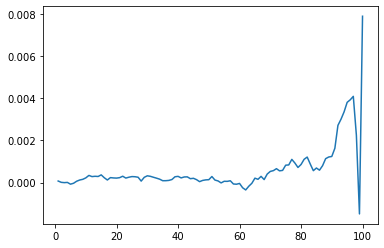

In [6]:
alpha = 2.0
clients = 100
windows = 100

x = np.arange(1, clients + 1)

y_real = np.cumsum(1/ alpha / (x[::-1]))
y_selective = model_simple_case(alpha, clients, windows)

plt.plot(x, y_real - y_selective)

plt.show()

Таким образом, можем сделать следующие выводы к первой задаче:
* Решение задачи с практики и результаты полученные здесь совпадают
* При увеличении параметра $\alpha$ матожидание времени ожидания уменьшается
* При увеличении числа окошек матожидание времени ожидания уменьшается
* Число людей не влияет на матожидание времени ожидания

Перейдём к моделированию пункта (b). 

In [7]:
import heapq as hq

def model_more_real_case(a: float, clients: int, windows: int):
    number_of_experiments = 10000
    total_waiting_time = np.zeros(clients)
    for _ in range(number_of_experiments):
        experiment = np.random.exponential(scale=1/a, size=windows + clients)
        at_windows = experiment[:windows].tolist() 
        hq.heapify(at_windows)
        for i in range(clients):
            next_waiting_time = hq.heappop(at_windows)
            total_waiting_time[i] += next_waiting_time
            hq.heappush(at_windows, experiment[windows + i] + next_waiting_time)
    return total_waiting_time / number_of_experiments

В первую очередь, посмотрим, что происходит при изменении параметра $\alpha$ в трёх случаях: количество клиентов больше количества окошков, равно и меньше.

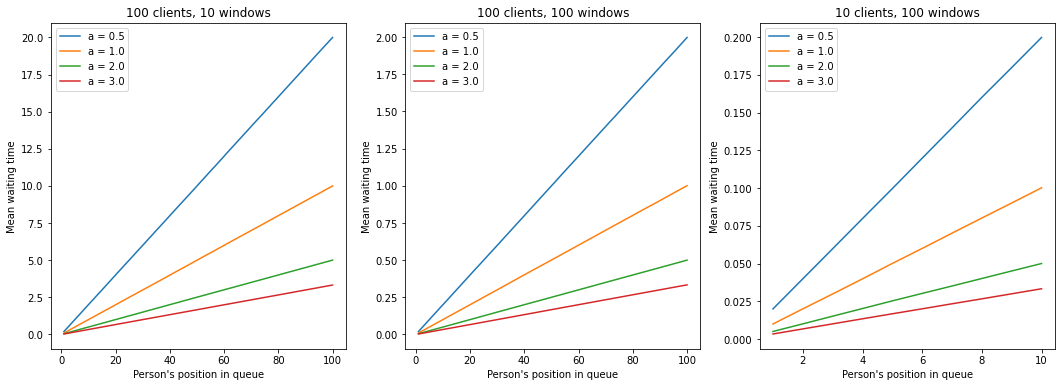

In [8]:
clients_windows = [(100, 10), (100, 100), (10, 100)]

alphas = [0.5, 1.0, 2.0, 3.0]

fig, axs = plt.subplots(1, 3)
fig.set_size_inches(18, 6)

for a in alphas:
    for ax, (clients, windows) in zip(axs, clients_windows):
        ax.plot(np.arange(1, clients+1), model_more_real_case(a, clients, windows), label=f'a = {a}')


for ax, (clients, windows) in zip(axs, clients_windows):
    ax.legend()
    ax.set_title(f'{clients} clients, {windows} windows')
    ax.set_xlabel('Person\'s position in queue')
    ax.set_ylabel('Mean waiting time')

plt.show()

Посмотрим, что происходит при изменении числа окошек

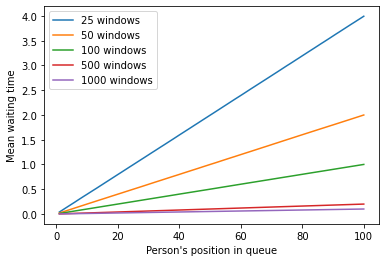

In [9]:
windows = [25, 50, 100, 500, 1000]
alpha = 1.0
clients = 100

for w in windows:
    plt.plot(np.arange(1, clients + 1), model_more_real_case(alpha, clients, w), label=f'{w} windows')
    
plt.xlabel('Person\'s position in queue')
plt.ylabel('Mean waiting time')
plt.legend()
plt.show()

Посмотрим, что происходит при изменении числа посетителей

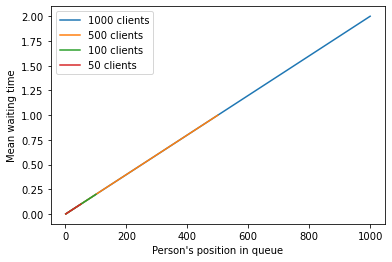

In [10]:
clients = [1000, 500, 100, 50] 
windows = 500
alpha = 1.0

for c in clients:
    plt.plot(np.arange(1, c + 1), model_more_real_case(alpha, c, windows), label=f'{c} clients')
    
plt.xlabel('Person\'s position in queue')
plt.ylabel('Mean waiting time')
plt.legend()
plt.show()

По графикам выше можно заметить, что выборочное матожидание достигает значения близкого к $\frac{1}{\alpha}$ в точке равной количеству окошек. Также, можно предположить, что график ведёт себя как прямая $$f(x) = \frac{1}{\alpha\cdot \text{number_of_windows}}\cdot x$$

Посмотрим на это предположение на большем количестве случаев, а именно построим два графика. 

В первом зафиксируем $\alpha$ и количество клиентов, будем менять количество окошек. Для каждого набора из 3 параметров посчитаем максимальную абсолютную разность между значениями прямой $f(x)$ и значениями которые выдаёт функция `model_more_real_case`.

Второй график построим аналогично, но зафиксируем уже количество окошек и количество людей, а менять будем $\alpha$.

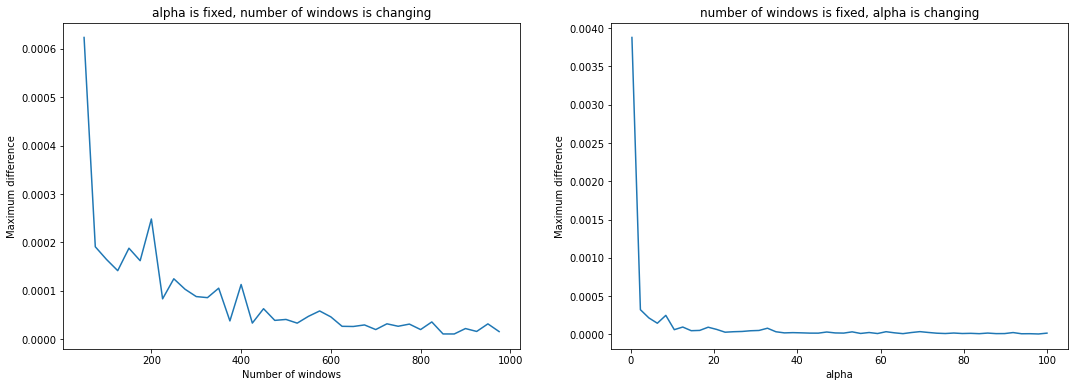

In [11]:
clients = 100
fixed_alpha = 5.0
fixed_num_of_windows = 100
windows_from_to_step = (50, 1000, 25)
alphas_from_to_num = (0.25, 100, 50)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 6)

def get_max_error(a, clients, windows):
    y_mean = model_more_real_case(a, clients, windows)
    y_line = 1 / windows / a * np.arange(1, clients + 1)
    return np.max(np.abs(y_mean - y_line))

windows = np.arange(*windows_from_to_step)

ax1.plot(windows, [get_max_error(fixed_alpha, clients, w) for w in windows])
ax1.set_title(f'alpha is fixed, number of windows is changing')
ax1.set_xlabel('Number of windows')
ax1.set_ylabel('Maximum difference')


alphas = np.linspace(*alphas_from_to_num)

ax2.plot(alphas, [get_max_error(a, clients, fixed_num_of_windows) for a in alphas])
ax2.set_title(f'number of windows is fixed, alpha is changing')
ax2.set_xlabel('alpha')
ax2.set_ylabel('Maximum difference')

plt.show()

Таким образом, можем сделать следующие выводы ко второй задаче:
* В рассмотренных случаях функция, которая по номеру человека в очереди выдаёт выборочное матожидание его времени ожидания, ведёт себя примерно как прямая $f(x) = \frac{1}{\alpha\cdot \text{number_of_windows}}\cdot x$
* При увеличении параметра $\alpha$ матожидание времени ожидания уменьшается
* При увеличении числа окошек матожидание времени ожидания уменьшается
* Число людей не влияет на матожидание времени ожидания